# Comparing to RCP 8.5

RCP 8.5 is the CMIP5 high emissions scenario, defined by the radiative forcing.  Since it represents a kind of "business as usual" scenario outside of PAGE, it provides a reasonable comparison case for the radiative forcings produced by PAGE.

In [1]:
using DataFrames, CSVFiles, Query, VegaLite, Dates

In [2]:
# Run the model
include("../src/main_model.jl")
m = getpage("RCP8.5 & SSP5")
run(m)

In [3]:
# Load the RCP 8.5 radiative forcings (by gas)

df_rcp = load("rcp85-radforcing.csv", colnames=Dict("v YEARS/GAS >" => "year")) |>
    @map({_.year, _.CO2_RF, _.CH4_RF, _.N2O_RF}) |> 
    DataFrame


df_rcp = stack(df_rcp, [:CO2_RF, :CH4_RF, :N2O_RF])
df_rcp[:model] = "RCP 8.5"

df_rcp = df_rcp |> @map({_.model, _.year, _.variable, _.value}) |> DataFrame

df_page_co2 = getdataframe(m, :co2forcing, :f_CO2forcing) |>
    @map({variable="CO2_RF", value=_.f_CO2forcing, year=_.time, model="PAGE-ICE"}) |>
    DataFrame

df_page_ch4 = getdataframe(m, :ch4forcing, :f_CH4forcing) |>
    @map({variable="CH4_RF", value=_.f_CH4forcing, year=_.time, model="PAGE-ICE"}) |>
    DataFrame

df_page_n2o = getdataframe(m, :n2oforcing, :f_N2Oforcing) |>
    @map({variable="N2O_RF", value=_.f_N2Oforcing, year=_.time, model="PAGE-ICE"}) |>
    DataFrame

df = vcat(df_rcp, df_page_co2, df_page_ch4, df_page_n2o)

df[:year] = Date.(df[:year])
df

┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use `df[!, col_ind] .= v`  when `df` has some columns
│   caller = top-level scope at In[3]:9
└ @ Core In[3]:9
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:26
└ @ Core In[3]:26
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[3]:26
└ @ Core In[3]:26


,model,year,variable,value
,String,Date,Any,Float64⍰
1,RCP 8.5,1765-01-01,CO2_RF,0.0
2,RCP 8.5,1766-01-01,CO2_RF,0.0110491
3,RCP 8.5,1767-01-01,CO2_RF,0.023246
4,RCP 8.5,1768-01-01,CO2_RF,0.0256052
5,RCP 8.5,1769-01-01,CO2_RF,0.028057
6,RCP 8.5,1770-01-01,CO2_RF,0.0305529
7,RCP 8.5,1771-01-01,CO2_RF,0.0330936
8,RCP 8.5,1772-01-01,CO2_RF,0.0357058
9,RCP 8.5,1773-01-01,CO2_RF,0.0383971


Here we produce a comparison dataframe, between `estimated` radiative forcings for CO2, N2O, and CH4, and those under RCP 8.5 (labeled by `rcp85`).

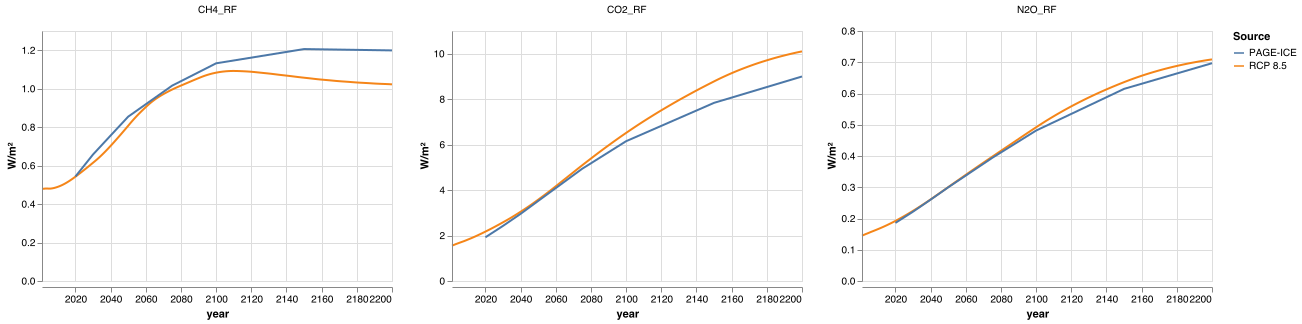

In [4]:
df |>
@filter(_.year > Date(2000) && _.year <= Date(2200)) |>
@vlplot(
    :line,
    width=350, height=250,
    x={"year(year)", title="year"},
    y={:value, title="W/m²"},
    column={"variable:n", title=""},
    color={:model, legend={title="Source"}},
    resolve={scale={y=:independent}}
)